## Прикладная статистика в машинном обучении
### Семинар 1: Метод максимального правдоподобия

In [1]:
# Всё стандартно
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import optimize

#### Пример с дискретным распределением (задача 1 с семинара)

In [2]:
# Запишем правдоподобие и его логарифм
def like(a):
    return 4 * a**2 * (1-5*a)

def loglike(a):
    return 2 * np.log(2 * a) + np.log(1 - 5 * a)

Text(0.5, 1.0, 'Правдоподобие')

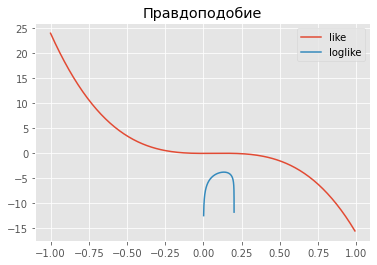

In [11]:
# Посмотрим картинку (масштаб неудачный!)
x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, like(x1), label = 'like')
x2 = np.arange(0.001, 0.2, 1e-5)
plt.plot(x2, loglike(x2), label = 'loglike')
plt.legend()
plt.title('Правдоподобие')

In [13]:
# Оптимизируем логарифм правдоподобия.
# Для этого создадим дамми-функцию, которая суть логарифм правдоподобия, взятый со знаком минус.
def opt_loglike(a):
    return -(2 * np.log(4 * a) + np.log(1 - 5 * a))

a_hat = optimize.minimize(opt_loglike, 0.05, method = 'Nelder-Mead')['x'][0]
a_hat

0.13335937500000028

In [19]:
# Информация Фишера (оценка)
def fisher(a):
    return 2 / (a**2) + 25 / (1 - 5 * a)**2 # E(-H)

Ifi_hat = fisher(a_hat)
Ifi_hat

337.6319518592493

In [20]:
# Оценка дисперсии оценки
var_a_hat = 1 / Ifi_hat
var_a_hat

0.0029618049905918743

In [53]:
# 95% доверительный интервал для а
left_bound = a_hat - 1.96 * np.sqrt(var_a_hat)
right_bound = a_hat + 1.96 * np.sqrt(var_a_hat)
print('a \in [%f; %f]' % (left_bound, right_bound))

a \in [0.026691; 0.240027]


#### Пример с непрерывным распределением (задачи 2-7 с семинара)

In [28]:
# Выборка
x = np.array([-3, 4, 2])

In [42]:
# Минус логарифм правдоподобия
def loglike(params, x):
    mu = params[0]
    sigma = params[1]
    n = len(x)
    ll = - n / 2 * np.log(2 * np.pi) - n * np.log(sigma) - 1 / (2 * sigma **2) * np.sum(np.square(x - mu))
    return -ll # Сразу для оптимизации

In [43]:
optimize.minimize(loglike, (0, 1), x, method = 'Nelder-Mead')

 final_simplex: (array([[0.99996103, 2.94392472],
       [1.00003802, 2.94389763],
       [0.99995001, 2.94384932]]), array([7.49604197, 7.49604197, 7.49604198]))
           fun: 7.496041973913671
       message: 'Optimization terminated successfully.'
          nfev: 121
           nit: 64
        status: 0
       success: True
             x: array([0.99996103, 2.94392472])

In [44]:
# Оценки получились очень близкими к посчитанным на семинаре
mu_hat = 0.99996103
sigma_hat = 2.94392472
sigma_hat_sq = sigma_hat ** 2

In [47]:
# Информация Фишера (оценка)
Ifi_hat = np.array([[len(x) / sigma_hat_sq, 0],
                    [0, 2 * len(x) / sigma_hat_sq]])
Ifi_hat

array([[0.3461528 , 0.        ],
       [0.        , 0.69230561]])

In [49]:
# Оценка дисперсии оценок
var_hat = np.linalg.inv(Ifi_hat)
var_hat

array([[2.88889759, 0.        ],
       [0.        , 1.44444879]])

In [52]:
# 95%-ый доверительный интервал для mu
left_bound = mu_hat - 1.96 * np.sqrt(var_hat[0, 0])
right_bound = mu_hat + 1.96 * np.sqrt(var_hat[0, 0])
print('mu \in [%f; %f]' % (left_bound, right_bound))

mu \in [-2.331403; 4.331325]
